In [1]:
import sys, os
sys.path.append(os.path.abspath('../../../../classifiers'))
sys.path.append(os.path.abspath('../../../../training'))
sys.path.append(os.path.abspath('../../../../validation'))
from validation_functions import execute_training_test_k_fold
from classifiers_ICQ import iqc_classifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
range_step = 100
k_times_fold = 10

In [3]:
iris = datasets.load_iris()

y = iris.target
X = PCA(n_components=3).fit_transform(iris.data)[:, :]

In [4]:
dic_classifier_params = {}
dic_classifier_params["sigma_q_params"] = [1,1,1,1]
dic_classifier_params["use_polar_coordinates_on_sigma_q"] = False
dic_classifier_params["load_inputvector_env_state"] = False
dic_classifier_params["normalize_axis"] = 1

In [5]:
dic_training_params = {"max_iter": 1000,
    "accuracy_succ": 0.99,
    "plot_graphs_and_metrics": False,
    "plot_graphs_in_classifier": False,
    "random_seed": 1,
    "learning_rate": 0.01,
    "do_classes_refit":True,
    "reset_weights_epoch":0,
    "batch":1}

In [6]:
%run ../printing_methods.ipynb

In [7]:
negativities_per_class = []
entropies_per_class = []
for clazz in range(len(set(y))):
    negativities_per_class.append([])
    entropies_per_class.append([])

In [8]:
%%time
scores_list = []
f1scores_list = []

for max_iter in range(1, 1000, range_step):
    dic_training_params["max_iter"] = max_iter
    scores, f1scores, output_dict = execute_training_test_k_fold(
                    X, 
                    y, 
                    k_folds=k_times_fold,
                    random_seed=1, 
                    classifier_function=iqc_classifier, 
                    dic_classifier_params=dic_classifier_params,
                    one_vs_classifier=OneVsRestClassifier, 
                    dic_training_params=dic_training_params,
                    print_each_fold_metric=True,
                    print_avg_metric=True)
    scores_list.append(np.mean(scores))
    f1scores_list.append(np.mean(f1scores))

    for clazz in range(len(set(y))):
        negativities_per_class[clazz].append(np.mean(output_dict["negativities"][clazz]))
        entropies_per_class[clazz].append(np.mean(output_dict["entropies"][clazz]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished


K-Fold #0
Mean negativities for all classes: [0.26424900350376473, 0.08822816368421181, 0.08816711268220236]
Mean entropies for all classes: [2.5323579631764273e-15, 2.534874969068428e-15, 2.4000481605084997e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divis

K-Fold #1
Mean negativities for all classes: [0.26685277957744175, 0.08756578047836285, 0.07960466376940034]
Mean entropies for all classes: [2.405740762251583e-15, 2.565798292213293e-15, 2.837259061864372e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [0.2666565373245632, 0.10644315504100973, 0.10071609195556701]
Mean entropies for all classes: [2.1517570569101484e-15, 1.7320940956221036e-15, 3.344173499058814e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.2511946692675052, 0.09422920747199325, 0.09204086165872219]
Mean entropies for all classes: [2.6756605569666698e-15, 1.7736428876374326e-15, 2.7411750988411588e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.2591900483850775, 0.056594830695455886, 0.058212715220796164]
Mean entropies for all classes: [1.9907312622009614e-15, 2.639962747370333e-15, 3.24577559488776e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [0.2578673708932181, 0.08132711071670569, 0.07679104284929159]
Mean entropies for all classes: [2.609699644435664e-15, 2.6539626235329603e-15, 3.0213907572969676e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.2585387145261555, 0.0871391813396178, 0.07611922943640081]
Mean entropies for all classes: [2.5148587893651814e-15, 2.6747239782913796e-15, 2.3958350594128102e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [0.2701084529330981, 0.09753225689376481, 0.09439074077427285]
Mean entropies for all classes: [2.0133169346730593e-15, 3.571226636377827e-15, 3.2682124259828413e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2708226349578081, 0.09550340966688958, 0.09520994573473658]
Mean entropies for all classes: [2.462119923159359e-15, 2.1443274589969175e-15, 3.1445046086803344e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [0.26627069108627666, 0.09333987314653465, 0.08487292663024913]
Mean entropies for all classes: [3.144478996275887e-15, 3.0833411032535076e-15, 2.228345741833585e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       5.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       5.0

    accuracy                           0.00      15.0
   macro avg       0.00      0.00      0.00      15.0
weighted avg       0.00      0.00      0.00      15.0

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.0 F1-Scores = 0.0 Negativity = [0.14688142662339296, 0.14467440794173497, 0.15793859477371333] Entropy = [2.489093697584452e-15, 2.6029327054430824e-15, 2.4093415505303555e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.27824029729778166, 0.08734982094187022, 0.26871640406947417]
Mean entropies for all classes: [2.8175476348520825e-15, 2.8668986309387117e-15, 3.1775603858194824e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.80      0.80      0.80         5
           2       1.00      0.80      0.89         5

    accuracy                           0.87        15
   macro avg       0.88      0.87      0.87        15
weighted avg       0.88      0.87      0.87        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.2553217158331048, 0.32914927639247665, 0.23182371793952103]
Mean entropies for all classes: [2.2670324636608976e-15, 3.3184685121566344e-15, 2.533434299451456e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.25987855212076144, 0.11375832459422472, 0.25440578011055326]
Mean entropies for all classes: [3.161453201618573e-15, 2.919950673154486e-15, 2.73008472098197e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.33      0.20      0.25         5
           2       0.60      0.60      0.60         5

    accuracy                           0.60        15
   macro avg       0.55      0.60      0.56        15
weighted avg       0.55      0.60      0.56        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26996583764514237, 0.34386676100154123, 0.2405166325029702]
Mean entropies for all classes: [2.0180351613987336e-15, 2.9698472457892325e-15, 2.410778150458624e-15]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.60        15
   macro avg       0.43      0.60      0.50        15
weighted avg       0.43      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.25817305824091324, 0.3423458602374721, 0.21688117145409633]
Mean entropies for all classes: [3.871043274644201e-15, 3.125382224805081e-15, 2.3402413050492e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.22523193399643582, 0.32943741651668407, 0.25457095335321345]
Mean entropies for all classes: [2.621224670497245e-15, 1.876620671925011e-15, 2.9772253742206493e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.76      0.67      0.61        15
weighted avg       0.76      0.67      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24811830138951535, 0.3336765652252099, 0.253924861560947]
Mean entropies for all classes: [2.0366639740763286e-15, 3.2574485575845745e-15, 2.035144899465446e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24432902174006982, 0.09881243721783628, 0.25790509713520865]
Mean entropies for all classes: [2.4868373382111385e-15, 1.986378883264212e-15, 3.4589280013808568e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.67      0.80      0.73         5
           2       0.75      0.60      0.67         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2717450086151139, 0.0957348962645635, 0.2587888951190886]
Mean entropies for all classes: [2.6157456301536373e-15, 2.810289892359544e-15, 2.337138308302129e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      0.60      0.67         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.82      0.80      0.80        15
weighted avg       0.82      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2555309689828934, 0.3216698620925323, 0.2427374054075317]
Mean entropies for all classes: [1.999511600718177e-15, 2.19840617767272e-15, 2.8806921727892566e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7133333333333333 F1-Scores = 0.6703920153920154 Negativity = [0.21143550743637532, 0.27209823672170086, 0.2093475522751798] Entropy = [2.9540022172034253e-15, 2.706311758422996e-15, 2.9371628652516763e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   39.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.27824029729778166, 0.2993418886207967, 0.26871640406947417]
Mean entropies for all classes: [2.8175476348520825e-15, 1.793122339828737e-15, 3.1775603858194824e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.2553217158331048, 0.32914927639247665, 0.23182371793952103]
Mean entropies for all classes: [2.2670324636608976e-15, 3.3184685121566344e-15, 2.533434299451456e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.52        15
weighted avg       0.48      0.60      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [0.25987855212076144, 0.3194997958535813, 0.25440578011055326]
Mean entropies for all classes: [3.161453201618573e-15, 1.7976780813086698e-15, 2.73008472098197e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.67        15
   macro avg       0.45      0.67      0.53        15
weighted avg       0.45      0.67      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26996583764514237, 0.2968290983248712, 0.2405166325029702]
Mean entropies for all classes: [2.0180351613987336e-15, 2.9691690716814218e-15, 2.410778150458624e-15]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.40      0.50         5
           2       1.00      1.00      1.00         5

    accuracy                           0.73        15
   macro avg       0.75      0.73      0.72        15
weighted avg       0.75      0.73      0.72        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   39.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.25817305824091324, 0.29896938496601994, 0.21688117145409633]
Mean entropies for all classes: [3.871043274644201e-15, 4.412287227334101e-15, 2.3402413050492e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   44.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.22523193399643582, 0.3486335590193251, 0.25457095335321345]
Mean entropies for all classes: [2.621224670497245e-15, 3.279767762747496e-15, 2.9772253742206493e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.76      0.67      0.61        15
weighted avg       0.76      0.67      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24811830138951535, 0.3336765652252099, 0.253924861560947]
Mean entropies for all classes: [2.0366639740763286e-15, 3.2574485575845745e-15, 2.035144899465446e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24432902174006982, 0.3397148958807727, 0.25790509713520865]
Mean entropies for all classes: [2.4868373382111385e-15, 3.431271612094105e-15, 3.4589280013808568e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2717450086151139, 0.33538654935421536, 0.2587888951190886]
Mean entropies for all classes: [2.6157456301536373e-15, 2.221323502369091e-15, 2.337138308302129e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2555309689828934, 0.3357760713369854, 0.2427374054075317]
Mean entropies for all classes: [1.999511600718177e-15, 3.023787032601496e-15, 2.8806921727892566e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.20      0.29         5
           2       0.62      1.00      0.77         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.6933333333333334 F1-Scores = 0.6408424908424909 Negativity = [0.2820995299960175, 0.27209823672170086, 0.27792804269496535] Entropy = [2.596076786833434e-15, 2.706311758422996e-15, 2.5630720013030705e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.27824029729778166, 0.2993418886207967, 0.26871640406947417]
Mean entropies for all classes: [2.8175476348520825e-15, 1.793122339828737e-15, 3.1775603858194824e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.2553217158331048, 0.2776647114953624, 0.23182371793952103]
Mean entropies for all classes: [2.2670324636608976e-15, 2.1401294848069807e-15, 2.533434299451456e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   59.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [0.25987855212076144, 0.3194997958535813, 0.25440578011055326]
Mean entropies for all classes: [3.161453201618573e-15, 1.7976780813086698e-15, 2.73008472098197e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.67        15
   macro avg       0.45      0.67      0.53        15
weighted avg       0.45      0.67      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   59.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26996583764514237, 0.2968290983248712, 0.2405166325029702]
Mean entropies for all classes: [2.0180351613987336e-15, 2.9691690716814218e-15, 2.410778150458624e-15]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.40      0.50         5
           2       1.00      1.00      1.00         5

    accuracy                           0.73        15
   macro avg       0.75      0.73      0.72        15
weighted avg       0.75      0.73      0.72        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   59.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.25817305824091324, 0.29896938496601994, 0.21688117145409633]
Mean entropies for all classes: [3.871043274644201e-15, 4.412287227334101e-15, 2.3402413050492e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.22523193399643582, 0.3486335590193251, 0.25457095335321345]
Mean entropies for all classes: [2.621224670497245e-15, 3.279767762747496e-15, 2.9772253742206493e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.76      0.67      0.61        15
weighted avg       0.76      0.67      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   59.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24811830138951535, 0.3435584109954314, 0.253924861560947]
Mean entropies for all classes: [2.0366639740763286e-15, 3.3695503459619465e-15, 2.035144899465446e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24432902174006982, 0.3397148958807727, 0.25790509713520865]
Mean entropies for all classes: [2.4868373382111385e-15, 3.431271612094105e-15, 3.4589280013808568e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2717450086151139, 0.24591307641974014, 0.2587888951190886]
Mean entropies for all classes: [2.6157456301536373e-15, 2.701980197786567e-15, 2.337138308302129e-15]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.75      0.60      0.67         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.82      0.80      0.80        15
weighted avg       0.82      0.80      0.80        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2555309689828934, 0.3357760713369854, 0.2427374054075317]
Mean entropies for all classes: [1.999511600718177e-15, 3.023787032601496e-15, 2.8806921727892566e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.20      0.29         5
           2       0.62      1.00      0.77         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.72 F1-Scores = 0.6778591778591778 Negativity = [0.2820995299960175, 0.2549367150893294, 0.27792804269496535] Entropy = [2.596076786833434e-15, 2.3135320826397782e-15, 2.5630720013030705e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.27824029729778166, 0.2993418886207967, 0.26871640406947417]
Mean entropies for all classes: [2.8175476348520825e-15, 1.793122339828737e-15, 3.1775603858194824e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.2553217158331048, 0.2776647114953624, 0.23182371793952103]
Mean entropies for all classes: [2.2670324636608976e-15, 2.1401294848069807e-15, 2.533434299451456e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [0.25987855212076144, 0.3194997958535813, 0.25440578011055326]
Mean entropies for all classes: [3.161453201618573e-15, 1.7976780813086698e-15, 2.73008472098197e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.67        15
   macro avg       0.45      0.67      0.53        15
weighted avg       0.45      0.67      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26996583764514237, 0.2968290983248712, 0.2405166325029702]
Mean entropies for all classes: [2.0180351613987336e-15, 2.9691690716814218e-15, 2.410778150458624e-15]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.40      0.50         5
           2       1.00      1.00      1.00         5

    accuracy                           0.73        15
   macro avg       0.75      0.73      0.72        15
weighted avg       0.75      0.73      0.72        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.25817305824091324, 0.29896938496601994, 0.21688117145409633]
Mean entropies for all classes: [3.871043274644201e-15, 4.412287227334101e-15, 2.3402413050492e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.22523193399643582, 0.3486335590193251, 0.25457095335321345]
Mean entropies for all classes: [2.621224670497245e-15, 3.279767762747496e-15, 2.9772253742206493e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.76      0.67      0.61        15
weighted avg       0.76      0.67      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24811830138951535, 0.3435584109954314, 0.253924861560947]
Mean entropies for all classes: [2.0366639740763286e-15, 3.3695503459619465e-15, 2.035144899465446e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24432902174006982, 0.34605456979649163, 0.25790509713520865]
Mean entropies for all classes: [2.4868373382111385e-15, 4.10858172543499e-15, 3.4589280013808568e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.71      1.00      0.83         5

    accuracy                           0.73        15
   macro avg       0.81      0.73      0.67        15
weighted avg       0.81      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2717450086151139, 0.3021326688600172, 0.2587888951190886]
Mean entropies for all classes: [2.6157456301536373e-15, 2.153523236406222e-15, 2.337138308302129e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.20      0.33         5
           2       0.62      1.00      0.77         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2555309689828934, 0.3357760713369854, 0.2427374054075317]
Mean entropies for all classes: [1.999511600718177e-15, 3.023787032601496e-15, 2.8806921727892566e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.20      0.29         5
           2       0.62      1.00      0.77         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7133333333333333 F1-Scores = 0.6652847152847153 Negativity = [0.2820995299960175, 0.2549367150893294, 0.27792804269496535] Entropy = [2.596076786833434e-15, 2.3135320826397782e-15, 2.5630720013030705e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.27824029729778166, 0.2993418886207967, 0.26871640406947417]
Mean entropies for all classes: [2.8175476348520825e-15, 1.793122339828737e-15, 3.1775603858194824e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.2553217158331048, 0.2776647114953624, 0.23182371793952103]
Mean entropies for all classes: [2.2670324636608976e-15, 2.1401294848069807e-15, 2.533434299451456e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [0.25987855212076144, 0.3194997958535813, 0.25440578011055326]
Mean entropies for all classes: [3.161453201618573e-15, 1.7976780813086698e-15, 2.73008472098197e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.67        15
   macro avg       0.45      0.67      0.53        15
weighted avg       0.45      0.67      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26996583764514237, 0.2968290983248712, 0.2405166325029702]
Mean entropies for all classes: [2.0180351613987336e-15, 2.9691690716814218e-15, 2.410778150458624e-15]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.67      0.40      0.50         5
           2       1.00      1.00      1.00         5

    accuracy                           0.73        15
   macro avg       0.75      0.73      0.72        15
weighted avg       0.75      0.73      0.72        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.25817305824091324, 0.29896938496601994, 0.21688117145409633]
Mean entropies for all classes: [3.871043274644201e-15, 4.412287227334101e-15, 2.3402413050492e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.22523193399643582, 0.3486335590193251, 0.25457095335321345]
Mean entropies for all classes: [2.621224670497245e-15, 3.279767762747496e-15, 2.9772253742206493e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.76      0.67      0.61        15
weighted avg       0.76      0.67      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24811830138951535, 0.3435584109954314, 0.253924861560947]
Mean entropies for all classes: [2.0366639740763286e-15, 3.3695503459619465e-15, 2.035144899465446e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24432902174006982, 0.3260574788668632, 0.25790509713520865]
Mean entropies for all classes: [2.4868373382111385e-15, 3.7557470627299085e-15, 3.4589280013808568e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2717450086151139, 0.3021326688600172, 0.2587888951190886]
Mean entropies for all classes: [2.6157456301536373e-15, 2.153523236406222e-15, 2.337138308302129e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.20      0.33         5
           2       0.62      1.00      0.77         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2555309689828934, 0.3357760713369854, 0.2427374054075317]
Mean entropies for all classes: [1.999511600718177e-15, 3.023787032601496e-15, 2.8806921727892566e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.20      0.29         5
           2       0.62      1.00      0.77         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.72 F1-Scores = 0.6757464757464758 Negativity = [0.2820995299960175, 0.2549367150893294, 0.27792804269496535] Entropy = [2.596076786833434e-15, 2.3135320826397782e-15, 2.5630720013030705e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.27824029729778166, 0.2993418886207967, 0.26871640406947417]
Mean entropies for all classes: [2.8175476348520825e-15, 1.793122339828737e-15, 3.1775603858194824e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.2553217158331048, 0.2776647114953624, 0.23182371793952103]
Mean entropies for all classes: [2.2670324636608976e-15, 2.1401294848069807e-15, 2.533434299451456e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [0.25987855212076144, 0.3194997958535813, 0.25440578011055326]
Mean entropies for all classes: [3.161453201618573e-15, 1.7976780813086698e-15, 2.73008472098197e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.67        15
   macro avg       0.45      0.67      0.53        15
weighted avg       0.45      0.67      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26996583764514237, 0.33192864693722784, 0.2405166325029702]
Mean entropies for all classes: [2.0180351613987336e-15, 2.4044445435506768e-15, 2.410778150458624e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.50      0.20      0.29         5
           2       0.80      0.80      0.80         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.25817305824091324, 0.29896938496601994, 0.21688117145409633]
Mean entropies for all classes: [3.871043274644201e-15, 4.412287227334101e-15, 2.3402413050492e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.22523193399643582, 0.3486335590193251, 0.25457095335321345]
Mean entropies for all classes: [2.621224670497245e-15, 3.279767762747496e-15, 2.9772253742206493e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.76      0.67      0.61        15
weighted avg       0.76      0.67      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24811830138951535, 0.3435584109954314, 0.253924861560947]
Mean entropies for all classes: [2.0366639740763286e-15, 3.3695503459619465e-15, 2.035144899465446e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24432902174006982, 0.3260574788668632, 0.25790509713520865]
Mean entropies for all classes: [2.4868373382111385e-15, 3.7557470627299085e-15, 3.4589280013808568e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2717450086151139, 0.3021326688600172, 0.2587888951190886]
Mean entropies for all classes: [2.6157456301536373e-15, 2.153523236406222e-15, 2.337138308302129e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.20      0.33         5
           2       0.62      1.00      0.77         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2555309689828934, 0.3357760713369854, 0.2427374054075317]
Mean entropies for all classes: [1.999511600718177e-15, 3.023787032601496e-15, 2.8806921727892566e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.20      0.29         5
           2       0.62      1.00      0.77         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7133333333333334 F1-Scores = 0.6653557553557553 Negativity = [0.2820995299960175, 0.2549367150893294, 0.27792804269496535] Entropy = [2.596076786833434e-15, 2.3135320826397782e-15, 2.5630720013030705e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.27824029729778166, 0.2993418886207967, 0.26871640406947417]
Mean entropies for all classes: [2.8175476348520825e-15, 1.793122339828737e-15, 3.1775603858194824e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.2553217158331048, 0.2776647114953624, 0.23182371793952103]
Mean entropies for all classes: [2.2670324636608976e-15, 2.1401294848069807e-15, 2.533434299451456e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [0.25987855212076144, 0.3194997958535813, 0.25440578011055326]
Mean entropies for all classes: [3.161453201618573e-15, 1.7976780813086698e-15, 2.73008472098197e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.67        15
   macro avg       0.45      0.67      0.53        15
weighted avg       0.45      0.67      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26996583764514237, 0.33192864693722784, 0.2405166325029702]
Mean entropies for all classes: [2.0180351613987336e-15, 2.4044445435506768e-15, 2.410778150458624e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.50      0.20      0.29         5
           2       0.80      0.80      0.80         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.25817305824091324, 0.29896938496601994, 0.21688117145409633]
Mean entropies for all classes: [3.871043274644201e-15, 4.412287227334101e-15, 2.3402413050492e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.22523193399643582, 0.3486335590193251, 0.25457095335321345]
Mean entropies for all classes: [2.621224670497245e-15, 3.279767762747496e-15, 2.9772253742206493e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.76      0.67      0.61        15
weighted avg       0.76      0.67      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24811830138951535, 0.3435584109954314, 0.253924861560947]
Mean entropies for all classes: [2.0366639740763286e-15, 3.3695503459619465e-15, 2.035144899465446e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24432902174006982, 0.3260574788668632, 0.25790509713520865]
Mean entropies for all classes: [2.4868373382111385e-15, 3.7557470627299085e-15, 3.4589280013808568e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2717450086151139, 0.3021326688600172, 0.2587888951190886]
Mean entropies for all classes: [2.6157456301536373e-15, 2.153523236406222e-15, 2.337138308302129e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.20      0.33         5
           2       0.62      1.00      0.77         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2555309689828934, 0.3357760713369854, 0.2427374054075317]
Mean entropies for all classes: [1.999511600718177e-15, 3.023787032601496e-15, 2.8806921727892566e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.20      0.29         5
           2       0.62      1.00      0.77         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7133333333333334 F1-Scores = 0.6653557553557553 Negativity = [0.2820995299960175, 0.2549367150893294, 0.27792804269496535] Entropy = [2.596076786833434e-15, 2.3135320826397782e-15, 2.5630720013030705e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.27824029729778166, 0.2993418886207967, 0.26871640406947417]
Mean entropies for all classes: [2.8175476348520825e-15, 1.793122339828737e-15, 3.1775603858194824e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.2553217158331048, 0.2776647114953624, 0.23182371793952103]
Mean entropies for all classes: [2.2670324636608976e-15, 2.1401294848069807e-15, 2.533434299451456e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [0.25987855212076144, 0.3194997958535813, 0.25440578011055326]
Mean entropies for all classes: [3.161453201618573e-15, 1.7976780813086698e-15, 2.73008472098197e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.67        15
   macro avg       0.45      0.67      0.53        15
weighted avg       0.45      0.67      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26996583764514237, 0.33192864693722784, 0.2405166325029702]
Mean entropies for all classes: [2.0180351613987336e-15, 2.4044445435506768e-15, 2.410778150458624e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.50      0.20      0.29         5
           2       0.80      0.80      0.80         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.25817305824091324, 0.29896938496601994, 0.21688117145409633]
Mean entropies for all classes: [3.871043274644201e-15, 4.412287227334101e-15, 2.3402413050492e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.22523193399643582, 0.3486335590193251, 0.25457095335321345]
Mean entropies for all classes: [2.621224670497245e-15, 3.279767762747496e-15, 2.9772253742206493e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.76      0.67      0.61        15
weighted avg       0.76      0.67      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24811830138951535, 0.3435584109954314, 0.253924861560947]
Mean entropies for all classes: [2.0366639740763286e-15, 3.3695503459619465e-15, 2.035144899465446e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24432902174006982, 0.3260574788668632, 0.25790509713520865]
Mean entropies for all classes: [2.4868373382111385e-15, 3.7557470627299085e-15, 3.4589280013808568e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2717450086151139, 0.3021326688600172, 0.2587888951190886]
Mean entropies for all classes: [2.6157456301536373e-15, 2.153523236406222e-15, 2.337138308302129e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.20      0.33         5
           2       0.62      1.00      0.77         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2555309689828934, 0.3357760713369854, 0.2427374054075317]
Mean entropies for all classes: [1.999511600718177e-15, 3.023787032601496e-15, 2.8806921727892566e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      0.20      0.29         5
           2       0.62      1.00      0.77         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.7133333333333334 F1-Scores = 0.6653557553557553 Negativity = [0.2820995299960175, 0.2549367150893294, 0.27792804269496535] Entropy = [2.596076786833434e-15, 2.3135320826397782e-15, 2.5630720013030705e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.27824029729778166, 0.2993418886207967, 0.26871640406947417]
Mean entropies for all classes: [2.8175476348520825e-15, 1.793122339828737e-15, 3.1775603858194824e-15]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.73        15
   macro avg       0.73      0.73      0.73        15
weighted avg       0.73      0.73      0.73        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.2553217158331048, 0.2776647114953624, 0.23182371793952103]
Mean entropies for all classes: [2.2670324636608976e-15, 2.1401294848069807e-15, 2.533434299451456e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #2
Mean negativities for all classes: [0.25987855212076144, 0.3194997958535813, 0.25440578011055326]
Mean entropies for all classes: [3.161453201618573e-15, 1.7976780813086698e-15, 2.73008472098197e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.00      0.00      0.00         5
           2       0.71      1.00      0.83         5

    accuracy                           0.67        15
   macro avg       0.45      0.67      0.53        15
weighted avg       0.45      0.67      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.26996583764514237, 0.33192864693722784, 0.2405166325029702]
Mean entropies for all classes: [2.0180351613987336e-15, 2.4044445435506768e-15, 2.410778150458624e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.50      0.20      0.29         5
           2       0.80      0.80      0.80         5

    accuracy                           0.67        15
   macro avg       0.64      0.67      0.62        15
weighted avg       0.64      0.67      0.62        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.25817305824091324, 0.29896938496601994, 0.21688117145409633]
Mean entropies for all classes: [3.871043274644201e-15, 4.412287227334101e-15, 2.3402413050492e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.20      0.33         5
           2       0.56      1.00      0.71         5

    accuracy                           0.73        15
   macro avg       0.85      0.73      0.68        15
weighted avg       0.85      0.73      0.68        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.22523193399643582, 0.3486335590193251, 0.25457095335321345]
Mean entropies for all classes: [2.621224670497245e-15, 3.279767762747496e-15, 2.9772253742206493e-15]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.20      0.33         5
           2       0.57      0.80      0.67         5

    accuracy                           0.67        15
   macro avg       0.76      0.67      0.61        15
weighted avg       0.76      0.67      0.61        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.24811830138951535, 0.3435584109954314, 0.253924861560947]
Mean entropies for all classes: [2.0366639740763286e-15, 3.3695503459619465e-15, 2.035144899465446e-15]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.40      0.57         5
           2       0.62      1.00      0.77         5

    accuracy                           0.80        15
   macro avg       0.88      0.80      0.78        15
weighted avg       0.88      0.80      0.78        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.24432902174006982, 0.3260574788668632, 0.25790509713520865]
Mean entropies for all classes: [2.4868373382111385e-15, 3.7557470627299085e-15, 3.4589280013808568e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.40      0.57         5
           2       0.71      1.00      0.83         5

    accuracy                           0.80        15
   macro avg       0.85      0.80      0.77        15
weighted avg       0.85      0.80      0.77        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.2717450086151139, 0.3021326688600172, 0.2587888951190886]
Mean entropies for all classes: [2.6157456301536373e-15, 2.153523236406222e-15, 2.337138308302129e-15]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.20      0.33         5
           2       0.62      1.00      0.77         5

    accuracy                           0.73        15
   macro avg       0.82      0.73      0.67        15
weighted avg       0.82      0.73      0.67        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #9
Mean negativities for all classes: [0.2555309689828934, 0.3357760713369854, 0.2427374054075317]
Mean entropies for all classes: [1.999511600718177e-15, 3.023787032601496e-15, 2.8806921727892566e-15]
              precision    recall  f1-score   support

           0       0.80      0

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.0min finished


In [9]:
print_score(scores_list)

Maior Score atingido com 301 épocas: 0.72

[0.0, 0.7133333333333333, 0.6933333333333334, 0.72, 0.7133333333333333, 0.72, 0.7133333333333334, 0.7133333333333334, 0.7133333333333334, 0.7133333333333334]




In [10]:
print_f1score(f1scores_list)

Maior F1Score atingido com 301 épocas: 0.6778591778591778

[0.0, 0.6703920153920154, 0.6408424908424909, 0.6778591778591778, 0.6652847152847153, 0.6757464757464758, 0.6653557553557553, 0.6653557553557553, 0.6653557553557553, 0.6653557553557553]




Negativities ao longo do treinamento
Classe 0 [0.26317509024549085, 0.2566534695861732, 0.2566534695861732, 0.2566534695861732, 0.2566534695861732, 0.2566534695861732, 0.2566534695861732, 0.2566534695861732, 0.2566534695861732, 0.2566534695861732]
Classe 1 [0.08879029691345461, 0.23958012204844112, 0.3236977084974254, 0.3105900892912886, 0.3168460159268882, 0.3148463068339254, 0.31835626169516107, 0.31835626169516107, 0.31835626169516107, 0.31835626169516107]
Classe 2 [0.08461253307116391, 0.24802709186526042, 0.24802709186526042, 0.24802709186526042, 0.24802709186526042, 0.24802709186526042, 0.24802709186526042, 0.24802709186526042, 0.24802709186526042, 0.24802709186526042]




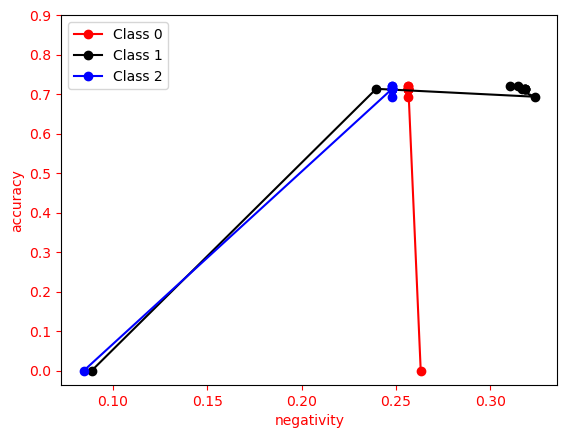

In [11]:
print_negativities(negativities_per_class, scores_list)

Entropies ao longo do treinamento
Classe 0 [2.4500721889414942e-15, 2.5895094949831017e-15, 2.5895094949831017e-15, 2.5895094949831017e-15, 2.5895094949831017e-15, 2.5895094949831017e-15, 2.5895094949831017e-15, 2.5895094949831017e-15, 2.5895094949831017e-15, 2.5895094949831017e-15]
Classe 1 [2.537395479236418e-15, 2.732969146965021e-15, 2.9504323699706324e-15, 2.8918743156151516e-15, 2.9047596308112057e-15, 2.8694761645406977e-15, 2.8130037117276234e-15, 2.8130037117276234e-15, 2.8130037117276234e-15, 2.8130037117276234e-15]
Classe 2 [2.862672000836714e-15, 2.6881227617919073e-15, 2.6881227617919073e-15, 2.6881227617919073e-15, 2.6881227617919073e-15, 2.6881227617919073e-15, 2.6881227617919073e-15, 2.6881227617919073e-15, 2.6881227617919073e-15, 2.6881227617919073e-15]




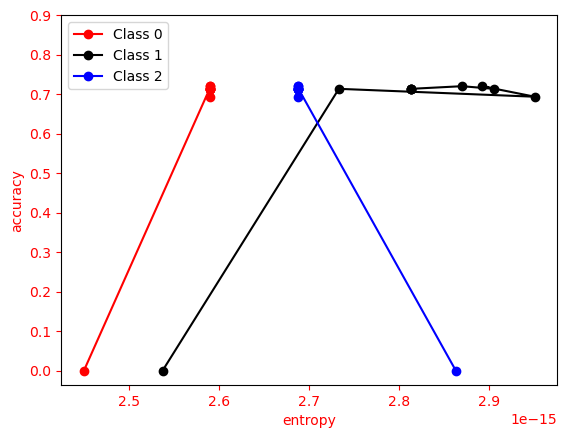

In [12]:
print_entropies(entropies_per_class, scores_list)